In [292]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()

In [293]:
data = pd.read_csv('../data/f_dataset.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,...,Popular,Very_Popular,Young,Somehow_Old,Old,Very_Old,Short,Somehow_Long,Long,Very_Long
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251.0,1995,26,12,Sega Genesis,Platformer,NaN,...,1,0,1,0,0,0,0,0,1,0
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,1517.0,2000,21,2,Dreamcast,3D Platformer,NaN,...,0,0,1,0,0,0,0,0,1,0
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436.0,2003,18,11,Game Boy Advance,NaN,NaN,...,1,0,1,0,0,0,0,0,0,1
3,Black Castle,Any%,Black Castle - Any%,512.0,2020,1,3,Game Boy Color,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797.0,1994,27,41,GameCube,Action,NaN,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Legacy of the Wizard,Any%,Legacy of the Wizard - Any%,1399.0,1987,34,17,Nintendo Entertainment System,NaN,NaN,...,1,0,1,0,0,0,0,0,1,0
454,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657.0,1987,34,33,Nintendo Entertainment System,NaN,NaN,...,0,1,0,0,0,1,1,0,0,0
455,Totally Rad,Any%,Totally Rad - Any%,848.0,1991,30,4,Nintendo Entertainment System,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
456,Dragon Fighter,Any%,Dragon Fighter - Any%,808.0,1990,31,9,Nintendo Entertainment System,NaN,NaN,...,1,0,1,0,0,0,0,1,0,0


In [294]:
data.columns

Index(['game', 'category', 'game+category', 'time', 'released_year', 'age',
       'nb_of_runs', 'main_platform', 'main_genre', 'engine', 'developer',
       'publisher', 'TAS_time', 'emulator', 'time_difference',
       '%_of_difference', 'Unpopular', 'Somehow_Popular', 'Popular',
       'Very_Popular', 'Young', 'Somehow_Old', 'Old', 'Very_Old', 'Short',
       'Somehow_Long', 'Long', 'Very_Long'],
      dtype='object')

In [295]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
imp.fit(data['time'].values.reshape(-1,1))

SimpleImputer(strategy='median')

In [296]:
data['time'] = imp.transform(data['time'].values.reshape(-1,1))

In [297]:
features = ['time','main_platform','main_genre','engine','developer','publisher','emulator','Unpopular', 'Somehow_Popular', 'Popular',
       'Very_Popular', 'Young', 'Somehow_Old', 'Old', 'Very_Old', 'Short',
       'Somehow_Long']
label = ['TAS_time']

In [298]:
X = pd.get_dummies(data[features])
y = data[label]

In [330]:
X.to_csv('test.csv')

In [299]:
features = X.columns
features

Index(['time', 'Unpopular', 'Somehow_Popular', 'Popular', 'Very_Popular',
       'Young', 'Somehow_Old', 'Old', 'Very_Old', 'Short',
       ...
       'emulator_Gens', 'emulator_Hourglass', 'emulator_JPC-RR',
       'emulator_Mupen64', 'emulator_PCSX', 'emulator_PSXjin', 'emulator_VBA',
       'emulator_libTAS', 'emulator_lsnes', 'emulator_snes9x'],
      dtype='object', length=311)

In [300]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [361]:
import statsmodels.api as sm
X_train_sm= sm.add_constant(X_train)

In [362]:
p_values = []
for feature in features:
    ls=sm.OLS(y_train,X_train_sm[feature]).fit()
    print(ls.summary())
    p_values.append(ls.pvalues)

                                 OLS Regression Results                                
Dep. Variable:               TAS_time   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              2473.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                   2.54e-152
Time:                        19:36:57   Log-Likelihood:                         -2624.9
No. Observations:                 320   AIC:                                      5252.
Df Residuals:                     319   BIC:                                      5256.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [303]:
t = []
for i in range(len(p_values)):
    if p_values[i].values < 0.2 :
        print(p_values[i])
        t.append(p_values[i].index)

time    2.538631e-152
dtype: float64
Unpopular    3.419868e-08
dtype: float64
Somehow_Popular    0.000002
dtype: float64
Popular    4.623410e-07
dtype: float64
Very_Popular    2.311562e-12
dtype: float64
Young    1.260116e-21
dtype: float64
Very_Old    1.386747e-11
dtype: float64
Somehow_Long    0.005358
dtype: float64
main_platform_Game Boy Advance    0.000008
dtype: float64
main_platform_Game Boy Color    0.049436
dtype: float64
main_platform_GameCube    0.010941
dtype: float64
main_platform_Nintendo 3DS Virtual Console    0.157744
dtype: float64
main_platform_Nintendo 64    0.000009
dtype: float64
main_platform_Nintendo DS    6.341116e-10
dtype: float64
main_platform_Nintendo Entertainment System    0.000928
dtype: float64
main_platform_PlayStation    0.147147
dtype: float64
main_platform_PlayStation 2    0.002916
dtype: float64
main_platform_Sega Genesis    0.031708
dtype: float64
main_platform_Sega Saturn    0.082788
dtype: float64
main_platform_Super Nintendo    2.190253e-07
dtyp

In [304]:
t

[Index(['time'], dtype='object'),
 Index(['Unpopular'], dtype='object'),
 Index(['Somehow_Popular'], dtype='object'),
 Index(['Popular'], dtype='object'),
 Index(['Very_Popular'], dtype='object'),
 Index(['Young'], dtype='object'),
 Index(['Very_Old'], dtype='object'),
 Index(['Somehow_Long'], dtype='object'),
 Index(['main_platform_Game Boy Advance'], dtype='object'),
 Index(['main_platform_Game Boy Color'], dtype='object'),
 Index(['main_platform_GameCube'], dtype='object'),
 Index(['main_platform_Nintendo 3DS Virtual Console'], dtype='object'),
 Index(['main_platform_Nintendo 64'], dtype='object'),
 Index(['main_platform_Nintendo DS'], dtype='object'),
 Index(['main_platform_Nintendo Entertainment System'], dtype='object'),
 Index(['main_platform_PlayStation'], dtype='object'),
 Index(['main_platform_PlayStation 2'], dtype='object'),
 Index(['main_platform_Sega Genesis'], dtype='object'),
 Index(['main_platform_Sega Saturn'], dtype='object'),
 Index(['main_platform_Super Nintendo'],

In [305]:
significative_features = ['time', 
 'Unpopular', 
 'Somehow_Popular', 
 'Popular', 
 'Very_Popular', 
 'Young', 
 'Very_Old',
 'Short',
 'Somehow_Long', 
 'main_platform_Game Boy Advance', 
 'main_platform_Game Boy Color', 
 'main_platform_GameCube', 
 'main_platform_Nintendo 3DS Virtual Console', 
 'main_platform_Nintendo 64', 
 'main_platform_Nintendo DS', 
 'main_platform_Nintendo Entertainment System', 
 'main_platform_PlayStation', 
 'main_platform_PlayStation 2', 
 'main_platform_Sega Genesis', 
 'main_platform_Sega Saturn', 
 'main_platform_Super Nintendo', 
 'main_platform_Wii U', 
 'main_platform_Wii Virtual Console', 
 'main_genre_Action', 
 'main_genre_Action Adventure', 
 'main_genre_Action-adventure', 
 'main_genre_Capcom', 
 'main_genre_JRPG', 
 'main_genre_Platform', 
 'main_genre_Platformer', 
 'main_genre_RPG', 
 'main_genre_Role-playing Game', 
 'main_genre_Strategy', 
 'engine_A.L.I.V.E', 
 'developer_Capcom', 
 'developer_Capcom Production Studio 3', 
 'developer_Chunsoft', 
 'developer_DeerForce', 
 'developer_Game Freak', 
 'developer_Insomniac Games', 
 'developer_Intelligent Systems', 
 'developer_Konami Computer Entertainment Osaka', 
 'developer_NCS', 
 'developer_Nintendo', 
 'developer_Nintendo R&D1', 
 'developer_Rare', 
 'developer_Skawo', 
 'developer_Square', 
 'developer_Sucker Punch Productions', 
 'publisher_Capcom', 
 'publisher_Enix', 
 'publisher_GT Interactive', 
 'publisher_Hudson Soft', 
 'publisher_Nintendo', 
 'publisher_SEGA', 
 'publisher_Skawo', 
 'publisher_Sony Computer Entertainment', 
 'publisher_Square', 
 'publisher_Treco', 
 'publisher_Ubisoft', 
 'emulator_BizHawk', 
 'emulator_DeSmuME', 
 'emulator_Dolphin', 
 'emulator_Mupen64', 
 'emulator_PCSX', 
 'emulator_PSXjin', 
 'emulator_snes9x']

In [306]:
ls=sm.OLS(y_train,X_train_sm[significative_features]).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               TAS_time   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     38.73
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           9.72e-99
Time:                        18:49:27   Log-Likelihood:                -2542.3
No. Observations:                 320   AIC:                             5199.
Df Residuals:                     263   BIC:                             5413.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [399]:
def MeanAbsoluteError(Y_test,y_test):
    n = len(Y_test)
    num = 0
    for i in range(n):
        num += abs(y_test[i]-Y_test.loc[i,label])

    return num[label].values[0]/n
def RMSE(Y_test,y_test):
    import math
    n = len(Y_test)
    num = 0
    for i in range(n):
        num += (y_test[i]-Y_test.loc[i,label])*(y_test[i]-Y_test.loc[i,label])

    return (math.sqrt(num[label].values/n))

def bias(Y_test,y_test):
    n = len(Y_test)
    num = 0
    for i in range(n):
        num += y_test[i]-Y_test.loc[i,label]

    return num[label].values[0]/n

In [308]:
from sklearn import linear_model
model1 = LinearRegression().fit(X_train['time'].values.reshape(-1,1), y_train)
print("Training test R² : "+str( model1.score( X_train['time'].values.reshape(-1,1), y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model1.predict(X_test['time'].values.reshape(-1,1)))))
print( "Test set RMSE : "+ str(RMSE(y_test,model1.predict(X_test['time'].values.reshape(-1,1)))) + " ("+str( RMSE(y_test,model1.predict(X_test['time'].values.reshape(-1,1))) * 100 / y_test[label].values.mean() ) +"% of the mean)")
print('Standard deviation of test set : '+str(y_test[label].values.std())+" ("+str(y_test[label].values.std()*100/y_test[label].values.mean())+"% of the mean)")


Training test R² : 0.8214567879357424
Test set Mean Absolue Error : 458.716627458635
Test set RMSE : 947.9568416675088 (53.17084327410326% of the mean)
Standard deviation of test set : 2322.223983319039 (130.25340610150744% of the mean)


In [309]:
ychapo_test_model1_array = model1.predict(X_test['time'].values.reshape(-1,1))
ychapo_model1 = []
for i in range(len(ychapo_test_model1_array)):
    ychapo_model1.append(ychapo_test_model1_array[i][0])

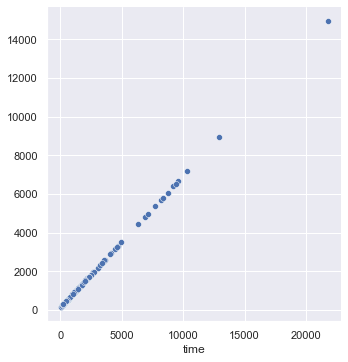

In [310]:
sns.relplot(x=X_test['time'],y=ychapo_model1)

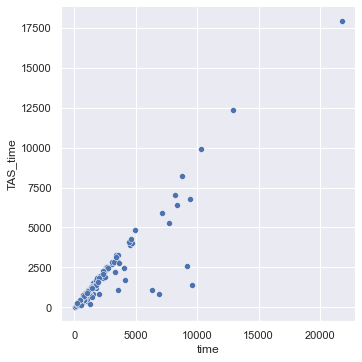

In [311]:
sns.relplot(x=X_test['time'],y=y_test['TAS_time'])

In [312]:
model1.coef_

array([[0.67933629]])

In [313]:
custom_features = ['time', 
 'Unpopular', 
 'Somehow_Popular', 
 'Popular', 
 'Very_Popular', 
 'Young', 
 'Very_Old',
 'Short',
 'Somehow_Long']

In [314]:
from sklearn import linear_model
model2 = LinearRegression().fit(X_train[significative_features], y_train)
print("Training test R² : "+str( model2.score( X_train[significative_features], y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model2.predict(X_test[significative_features]))))
print( "Test set RMSE : "+ str(RMSE(y_test,model2.predict(X_test[significative_features]))) + " ("+str( RMSE(y_test,model2.predict(X_test[significative_features])) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8918477639416286
Test set Mean Absolue Error : 574.3050195085069
Test set RMSE : 1013.3144567736541 (56.83674804616555% of the mean)


In [315]:
ychapo_test_model2_array = model2.predict(X_test[significative_features])
ychapo_model2 = []
for i in range(len(ychapo_test_model2_array)):
    ychapo_model2.append(ychapo_test_model2_array[i][0])

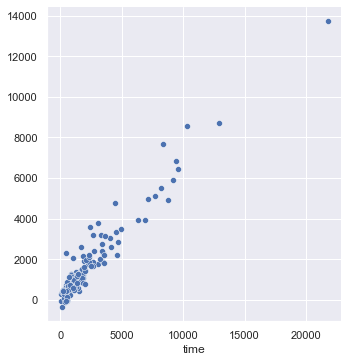

In [316]:
sns.relplot(x=X_test['time'],y=ychapo_model2)

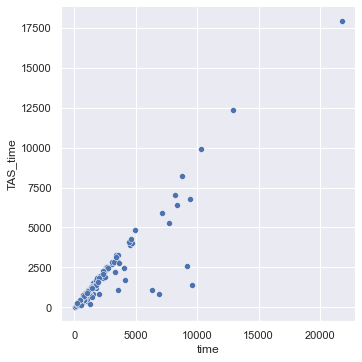

In [317]:
sns.relplot(x=X_test['time'],y=y_test['TAS_time'])

In [318]:
alphas = 10**np.linspace(10,-2,100)*0.5
model3 = linear_model.RidgeCV(alphas=alphas,cv=3).fit(X_train[significative_features], y_train)
print("Training test R² : "+str( model3.score( X_train[significative_features], y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model3.predict(X_test[significative_features]))))
print( "Test set RMSE : "+ str(RMSE(y_test,model3.predict(X_test[significative_features]))) + " ("+str( RMSE(y_test,model3.predict(X_test[significative_features])) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8622654788943491
Test set Mean Absolue Error : 473.040561187335
Test set RMSE : 920.7668190512485 (51.64575651107573% of the mean)


In [319]:
ychapo_test_model3_array = model3.predict(X_test[significative_features])
ychapo_model3 = []
for i in range(len(ychapo_test_model3_array)):
    ychapo_model3.append(ychapo_test_model3_array[i][0])

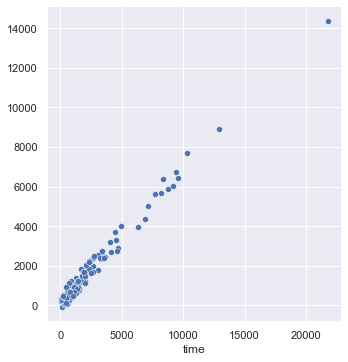

In [320]:
sns.relplot(x=X_test['time'],y=ychapo_model3)

In [321]:
alphas = 10**np.linspace(10,-2,100)*0.5
model4 = linear_model.RidgeCV(alphas=alphas,cv=3).fit(X_train, y_train)
print("Training test R² : "+str( model4.score( X_train, y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model4.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model4.predict(X_test))) + " ("+str( RMSE(y_test,model4.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8738743418932885
Test set Mean Absolue Error : 476.69158492544227
Test set RMSE : 913.1598414533244 (51.219081586785556% of the mean)


In [404]:
model5 = linear_model.LassoCV(alphas=alphas).fit(X_train, np.array(y_train).ravel())
print("Training test R² : "+str( model5.score( X_train, np.array(y_train).ravel() ) ) )
print("Biais on test set : "+str(bias( y_test,model8.predict(X_test) ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model5.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model5.predict(X_test))) + " ("+str( RMSE(y_test,model5.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8466230709854332
Biais on test set : -24.66936181909025
Test set Mean Absolue Error : 465.6425235411095
Test set RMSE : 912.1104597777943 (51.16022183056904% of the mean)


In [323]:
ychapo_model5 = model5.predict(X_test)

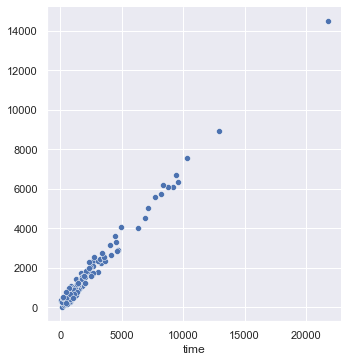

In [324]:
sns.relplot(x=X_test['time'],y=ychapo_model5)

In [325]:
model6 = linear_model.ElasticNetCV(l1_ratio=np.arange(0.01,1,0.01)).fit(X_train, np.array(y_train).ravel())
print("Training test R² : "+str( model6.score( X_train, np.array(y_train).ravel() ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model6.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model6.predict(X_test))) + " ("+str( RMSE(y_test,model6.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8188229275889672
Test set Mean Absolue Error : 485.9424365723594
Test set RMSE : 974.2926940575818 (54.648019679581054% of the mean)


In [326]:
from sklearn import linear_model
model7 = LinearRegression().fit(X_train[custom_features], y_train)
print("Training test R² : "+str( model7.score( X_train[custom_features], y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model7.predict(X_test[custom_features]))))
print( "Test set RMSE : "+ str(RMSE(y_test,model7.predict(X_test[custom_features]))) + " ("+str( RMSE(y_test,model7.predict(X_test[custom_features])) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8401941662105002
Test set Mean Absolue Error : 479.51043004396934
Test set RMSE : 913.5498217291562 (51.24095555742938% of the mean)


In [327]:
ychapo_test_model7_array = model7.predict(X_test[custom_features])
ychapo_model7 = []
for i in range(len(ychapo_test_model7_array)):
    ychapo_model7.append(ychapo_test_model7_array[i][0])

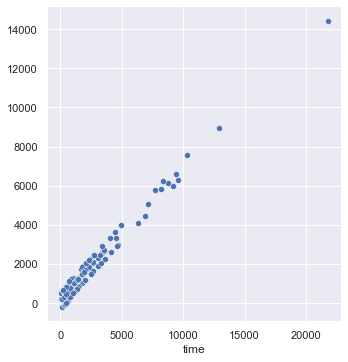

In [328]:
sns.relplot(x=X_test['time'],y=ychapo_model7)

In [385]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators':np.arange(70,90,1)}
grid = GridSearchCV(RandomForestRegressor(), parameters)
model8 = grid.fit(X_train,np.array(y_train).ravel())

In [386]:
grid.best_params_

{'n_estimators': 87}

In [403]:
print("Training test R² : "+str( model8.score( X_train, np.array(y_train).ravel() ) ) )
print("Biais on test set : "+str(bias( y_test,model8.predict(X_test) ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model8.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model8.predict(X_test))) + " ("+str( RMSE(y_test,model8.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.9827922712566953
Biais on test set : -24.66936181909025
Test set Mean Absolue Error : 438.9622316897108
Test set RMSE : 1215.320637366191 (68.16726278752472% of the mean)


In [390]:
parameters = {'n_estimators':np.arange(70,90,1),'criterion':('mse','mae'),'max_features':('auto','log2','sqrt')}
grid = GridSearchCV(RandomForestRegressor(), parameters,scoring='neg_mean_absolute_error',cv=3)
model9 = grid.fit(X_train,np.array(y_train).ravel())

In [393]:
grid.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 76}

In [402]:
print("Training test Neg Mean Absolute Error : "+str( model9.score( X_train, np.array(y_train).ravel() ) ) )
print("Biais on test set : "+str(bias( y_test,model9.predict(X_test) ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model9.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model9.predict(X_test))) + " ("+str( RMSE(y_test,model9.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test Neg Mean Absolute Error : -117.6646145970395
Biais on test set : -20.14445382023888
Test set Mean Absolue Error : 450.89774450165265
Test set RMSE : 1241.97691566717 (69.66241186342468% of the mean)


In [357]:
import datetime
sly = pd.read_csv("../data/sly.csv",sep='\t')

sly

,time,Unpopular,Somehow_Popular,Popular,Very_Popular,Young,Somehow_Old,Old,Very_Old,Short,...,emulator_Gens,emulator_Hourglass,emulator_JPC-RR,emulator_Mupen64,emulator_PCSX,emulator_PSXjin,emulator_VBA,emulator_libTAS,emulator_lsnes,emulator_snes9x
0,2033,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,206,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [406]:
prediction_model1 = model1.predict(sly['time'].values.reshape(-1,1))
prediction_model5 = model5.predict(sly)
prediction_model8 = model8.predict(sly)
prediction_model9 = model9.predict(sly)

print("Model 1 (simple linear regression) prediction : "+str(datetime.timedelta(seconds=prediction_model1[0][0])))
print("Model 5 (Lasso Regression) prediction : "+str(datetime.timedelta(seconds=prediction_model5[0])))
print("Model 8 (Random Forest Regressor) prediction : "+str(datetime.timedelta(seconds=prediction_model8[0])))
print("Model 9 (Random Forest Regressor) prediction : "+str(datetime.timedelta(seconds=prediction_model9[0])))

Model 1 (simple linear regression) prediction : 0:25:16.084527
Model 5 (Lasso Regression) prediction : 0:27:28.444508
Model 8 (Random Forest Regressor) prediction : 0:29:09.306092
Model 9 (Random Forest Regressor) prediction : 0:28:25.138553


In [409]:
str(datetime.timedelta(seconds=(prediction_model8[0]+prediction_model9[0])/2))

'0:28:47.222322'